** 1. Consider the following LP problem:** 


\begin{equation}
\begin{array}{rrclcl}
\displaystyle \max_{x} & {x_2} \\
\textrm{s.t.} & -x_1+x_2 & \leq & {1} \\
& -0.5 x_1+x_2 & \leq & {2} \\
& x_1+x_2 & \leq & {9} \\
& 0.5 x_1+x_2 & \leq & {6} \\
& x_1 \geq{0}, x_2\geq{0} \\
\end{array}
\end{equation}



A. Use Julia's solver to find the solution.

B. What is the value of the objective function evaluated at the optimal solution?

C. Draw the constraints and the objective function at the optimal level.

D. Justify the optimal solution

### A.

In [17]:
using JuMP
using GLPKMathProgInterface

myModel= Model(solver=GLPKSolverLP())
@variable(myModel, x1 >= 0)
@variable(myModel, x2 >= 0)
@constraint(myModel, -x1 + x2 <= 1)
@constraint(myModel, -0.5*x1 + x2 <= 2)
@constraint(myModel, x1 + x2 <= 9)
@constraint(myModel, 0.5*x1 + x2 <= 6)
@objective(myModel, Max, x2)
myModel

Maximization problem with:
 * 4 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [18]:
@time begin
    status = solve(myModel)
end
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  4.790226 seconds (3.21 M allocations: 135.029 MB, 1.72% gc time)
x1 = 4.0
x2 = 4.0


### B.

In [19]:
println("Objective value: ", getobjectivevalue(myModel))

Objective value: 4.0


### C.

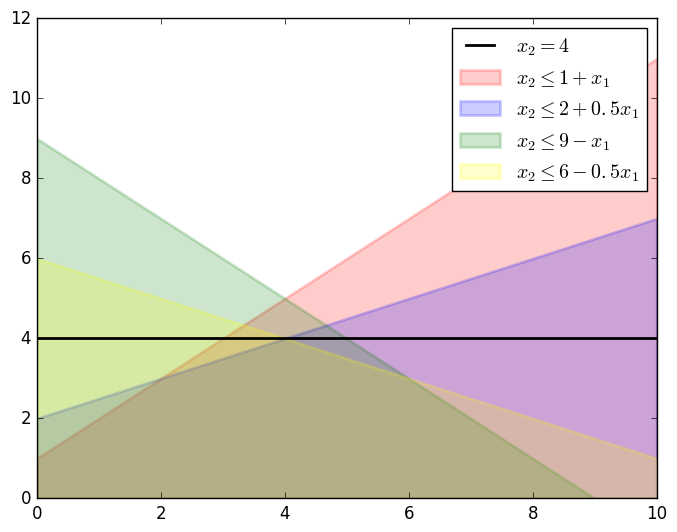

PyObject <matplotlib.legend.Legend object at 0x32d40ee50>

In [37]:
using PyPlot

x1 = collect(0:0.1:10)
x2a = 1+x1
x2b = 2+0.5*x1
x2c=ifelse(9-x1.>=0,9-x1,0) 
x2d=6-0.5*x1

x2e=0*x1+4

fig, ax = subplots()
ax[:fill_between](x1,x2a,color="red",linewidth=2,label=L"x_{2} \leq 1 + x_{1}",alpha=0.2)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 +0.5x_{1}",alpha=0.2)
ax[:legend](loc="upper right")

ax[:fill_between](x1,x2c,color="green",linewidth=2,label=L"x_{2} \leq 9 - x_{1}",alpha=0.2)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2d,color="yellow",linewidth=2,label=L"x_{2} \leq 6 - 0.5x_{1}",alpha=0.2)
ax[:legend](loc="upper right")

ax[:plot](x1,x2e,color="black",linewidth=2,label=L"x_{2} = 4",alpha=1)
ax[:legend](loc="upper right")

### D.

The objective function is a line and its intersection with the feasable solution set is the obtimization solution. In this example, the constraints overlap is maximized at x=2, which is a basic solution (a corner of the polyedron) as well.

** 2  .  Consider the following LP problem:**

\begin{equation}
\begin{array}{rrclcl}
\displaystyle \max_{x} & 6{x_1}+ 4{x_2} \\
\textrm{s.t.} & 2x_1+ 3x_2 & \leq & {9} \\
& x_1 \leq & {3} \\
& x_2 \leq & {2} \\
& x_1 \geq{0}, x_2\geq{0} \\
\end{array}
\end{equation}

A. Use Julia's solver to find the solution.

B. What is the value of the objective function evaluated at the optimal solution?

C. Draw the constraints and the objective function at the optimal level.

D. Justify the optimal solution

### A.

In [4]:
using JuMP
using GLPKMathProgInterface

myModel3= Model(solver=GLPKSolverLP())
@variable(myModel3, x1 >= 0)
@variable(myModel3, x2 >= 0)
@constraint(myModel3, 2*x1 + 3* x2 <= 9)
@constraint(myModel3, x1<= 3)
@constraint(myModel3, x2 <= 2)
@objective(myModel3, Max, 6*x1+4*x2)
myModel3

Maximization problem with:
 * 3 linear constraints
 * 2 variables
Solver is GLPKInterfaceLP

In [5]:
@time begin
    status = solve(myModel3)
end
println("x1 = ", getvalue(x1))
println("x2 = ", getvalue(x2))

  0.000331 seconds (99 allocations: 6.188 KB)
x1 = 3.0
x2 = 1.0


### B.

In [6]:
println("Objective value: ", getobjectivevalue(myModel3))

Objective value: 22.0


### C.

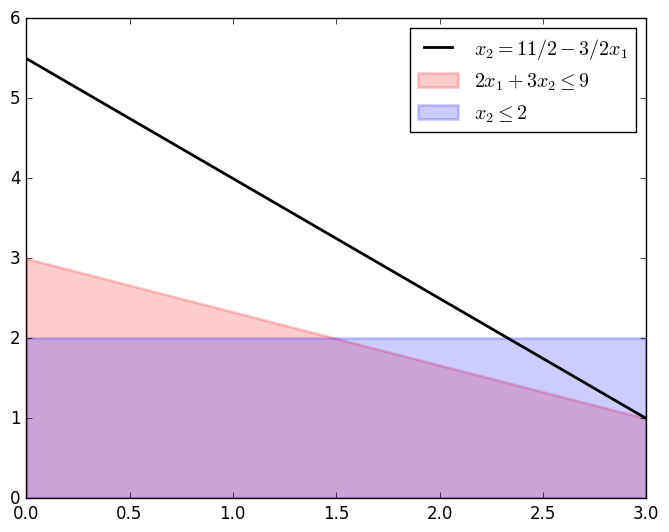

PyObject <matplotlib.legend.Legend object at 0x3213270d0>

In [9]:
using PyPlot

x1 = collect(0:0.1:3)
x2a = 3-2/3*x1
x2b = 2
x2c=11/2-3/2*x1


fig, ax = subplots()
ax[:fill_between](x1,x2a,color="red",linewidth=2,label=L"2x_{1} + 3x_{2}  \leq 9",alpha=0.2)
ax[:legend](loc="upper right")
ax[:fill_between](x1,x2b,color="blue",linewidth=2,label=L"x_{2} \leq 2 ",alpha=0.2)
ax[:legend](loc="upper right")

ax[:plot](x1,x2c,color="black",linewidth=2,label=L"x_{2} = 11/2 - 3/2x_{1}",alpha=1)
ax[:legend](loc="upper right")

### D.

The objective function  intersection with the feasable solution set is the obtimization solution. In this example, the constraints overlap is maximized at x1=3 and x2=1, which is a basic solution (a corner of the polyedron) as well. one of the constarints which is x1<=3 was also built into the x1 range

**3 .  Consider the following short-term financing problem of a corporation. The treasury deparment determined that the company will financial obligations as described in the table below:**

**Notes:** In thousands of dollars. NCF = Net Cash Flow

The company has two methods to conduct short-term financing. It can borrow up to $100k monthly at a  0.5%
  interest rate per month. It can also issue a 3-month zero-coupon bond at  1.5%
  for a three month period. Any available cash at the end of each month can earn  0.2%
  interest rate per month.
  
|Month   |Jul 2013|Aug 2013|Sep 2013|Oct 2013|Nov 2013|Dec 2013|
|---|---|---|---|---|---|---|
|NCF   |-250   |-50   |225   |-175   |150   |400   |
  


A. For each month, find the amount of borrowing between the two instruments that maximizes the total amount of cash available in December 2013.

B. What is the optimal amount of cash on Dec 2013?

C. Interpret the results and develop a storyline implied by the LP solution.

### A.

sf1= short term financing month 1

sf2= short term financing month 2

sf3= short term financing month 3

sf4= short term financing month 4

sf5= short term financing month 5

sfi=<100,000

b1= 3-month zero-coupon bond 1

b2= 3-month zero-coupon bond 2

b3= 3-month zero-coupon bond 3

cash1= Any available cash at the end of month 1

cash2= Any available cash at the end of month 2

cash3= Any available cash at the end of month 3

cash4= Any available cash at the end of month 4

cash5= Any available cash at the end of month 5

cash6= Any available cash at the end of month 5


\begin{equation}
\begin{array}{rrclcl}
\displaystyle \max_{} & {cash6} \\
\textrm{s.t.} & b1 + sf1-cash1=250,000\\
& -1.005sf1 + b2 + sf2 + 1.002cash1 - cash2=50,000\\
& -1.005sf2 + b3 + sf3 + 1.002cash2 - cash3= -225,000\\
& -1.005sf3 + sf4 + 1.002cash3 -1.015b1 - cash4= 175,000 \\
& -1.005sf4 + sf5 + 1.002cash4 -1.015b2 - cash5= -150,000\\
& -1.005sf5 + 1.002cash5 -1.015b3 - cash6= -400,000 \\
& sf_j & \geq & 0 & & \forall j \in {1,2,3,4,5} \\
& sf_j & \leq & 100,000 & & \forall j \in {1,2,3,4,5} \\
& b_j & \geq & 0 & & \forall j \in {1,2,3} \\
& cash_j & \geq & 0 & & \forall j \in {1,2,3,4,5,6} \\
\end{array}
\end{equation}



In [17]:
using JuMP
using GLPKMathProgInterface

myModel2= Model(solver=GLPKSolverLP())
@variable(myModel2, sf1 >= 0)
@variable(myModel2, sf2 >= 0)
@variable(myModel2, sf3 >= 0)
@variable(myModel2, sf4 >= 0)
@variable(myModel2, sf5 >= 0)

@variable(myModel2, b1 >= 0)
@variable(myModel2, b2 >= 0)
@variable(myModel2, b3 >= 0)

@variable(myModel2, cash1 >= 0)
@variable(myModel2, cash2 >= 0)
@variable(myModel2, cash3 >= 0)
@variable(myModel2, cash4 >= 0)
@variable(myModel2, cash5 >= 0)
@variable(myModel2, cash6 >= 0)

@constraint(myModel2, b1 + sf1 - cash1 == 250000)
@constraint(myModel2, - 1.005 * sf1 + b2 + sf2 + 1.002 * cash1 - cash2 == 50000 )
@constraint(myModel2, - 1.005 * sf2 + b3 + sf3 + 1.002 * cash2 - cash3 == -225000)
@constraint(myModel2, - 1.005 * sf3 + sf4 + 1.002 * cash3 - 1.015 * b1 - cash4 == 175000)
@constraint(myModel2, - 1.005 * sf4 + sf5 + 1.002 * cash4 - 1.015 * b2 - cash5 == - 150000)
@constraint(myModel2, - 1.005 * sf5 + 1.002 * cash5 - 1.015 * b3 - cash6 == - 400000)

@constraint(myModel2, sf1 <= 100000)
@constraint(myModel2, sf2 <= 100000)
@constraint(myModel2, sf3 <= 100000)
@constraint(myModel2, sf4 <= 100000)
@constraint(myModel2, sf5 <= 100000)


@objective(myModel2, Max, cash6)
myModel2

Maximization problem with:
 * 11 linear constraints
 * 14 variables
Solver is GLPKInterfaceLP

In [18]:
@time begin
    status = solve(myModel2)
end
println("b1 = ", getvalue(b1))
println("b2 = ", getvalue(b2))
println("b3 = ", getvalue(b3))

println("sf1 = ", getvalue(sf1))
println("sf2 = ", getvalue(sf2))
println("sf3 = ", getvalue(sf3))
println("sf4 = ", getvalue(sf4))
println("sf5 = ", getvalue(sf5))

println("cash1 = ", getvalue(sf1))
println("cash2 = ", getvalue(cash2))
println("cash3 = ", getvalue(cash3))
println("cash4 = ", getvalue(cash4))
println("cash5 = ", getvalue(cash5))
println("cash6 = ", getvalue(cash6))


  0.000372 seconds (163 allocations: 11.469 KB)
b1 = 150000.0
b2 = 50499.999999999985
b3 = 102296.40718562869
sf1 = 100000.0
sf2 = 100000.0
sf3 = 0.0
sf4 = 100000.0
sf5 = 1757.4999999999563
cash1 = 100000.0
cash2 = 0.0
cash3 = 226796.40718562872
cash4 = 0.0
cash5 = 0.0
cash6 = 294402.85920658696


### B.

In [19]:
println("Objective value: ", getobjectivevalue(myModel2))

Objective value: 294402.85920658696


### C.

Based on the LP results, in Decmeber of 2016 we could have accrued $294,402.86 if we issue bond in July, August, and September for 150,000, 50,400.40 ,and 102,296.40 (with the assumption that we could only issue bonds in the first 3 months to be able to pay back in full within 3 months from the initiation) in addition of short term of 100K in 1st, 2nd,and 4 th month and 1755750 in the 5 th month (with the assumption that we could only get loan in the first 5 months to be able to pay back in full by December of 2013). 